# Trabajo Practico - Desarrollo de software para el cálculo de parámetros acústicos ISO 3382 (1er entrega)

## Fecha de entrega

*18/04/2023*

## Integrantes

* <Martín, Romeo>
* <Rómulo, Achulli Orccori>
* <Luca, Falchini>
* <Fausto, Doce>

## Aspectos generales del notebook

* Todas las funciones deben contar con su [docstring](https://realpython.com/documenting-python-code/#docstring-types), como figura en la funcion de ejemplo (`ruidoRosa_voss`).
* Todos los gráficos deben tener correctamente etiquetados los ejes.
* Enviar el notebook (.ipynb) completado y con las celdas ejecutas a myommi@untref.edu.ar.
* Todas las señales de audio deben ser grabadas en formato .wav en la misma función que las genera.

## Librerias utilizadas
Agregar todas las librerias utilizadas, algunas a modo de ejemplo:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import wave
from scipy.io.wavfile import write
from scipy import signal
import soundfile as sf
import sounddevice as sd
import scipy.fftpack


## Función de sintetización de ruido rosa
El ruido rosa o ruido $\frac{1}{\sqrt{f}}$ , dónde $f$ denota frecuencia en Hz, es un ruido con una distribución de frecuencias tal que su densidad espectral de potencia es proporcional a la inversa de la frecuencia. Esto implica que su nivel, por bandas de tercio de octava, es constante. El nivel del ruido rosa por intervalo fijo de frecuencias va decayendo a razón de 3 dB/octava, de forma no lineal aunque las frecuencias se representan en un eje lineal.

![Espectro del ruido rosa](./image44.png)
<center><b>Fig 1.</b> Espectro del ruido rosa.</center>

Se adjunta a continuación una función que devuelva un ruido rosa sintetizado a partir del algoritmo de Voss y Clarke (pueden encontrar mas informacion en [este enlace](https://www.dsprelated.com/showabstract/3933.php) y en [este notebook](https://github.com/AllenDowney/ThinkDSP/blob/master/code/voss.ipynb)). 

**Consigna:** modificar la función original para que reciba como parametro la duración del ruido en segundos $t$ y como parametro opcional la frecuencia de muestreo $fs$ (Ayuda: la longitud de la señal sera el producto entre ambos). La función debe guardar el archivo de audio .wav de la señal generada y devolver el vector de datos de la señal.

In [4]:
def ruidoRosa_voss_modified(t, fs=44100, ncols=16):
    """
    Genera ruido rosa utilizando el algoritmo de Voss-McCartney(https://www.dsprelated.com/showabstract/3933.php).
    
    .. Nota:: si 'ruidoRosa.wav' existe, este será sobreescrito
    
    Parametros
    ----------
    t : float
        Valor temporal en segundos, este determina la duración del ruido generado.
    rcols: int
        Determina el número de fuentes a aleatorias a agregar.
    fs: int
        Frecuencia de muestreo en Hz de la señal. Por defecto el valor es 44100 Hz.
    
    returns: NumPy array
        Datos de la señal generada.
    
    Ejemplo
    -------
    Generar un `.wav` desde un numpy array de 10 segundos con ruido rosa a una 
    frecuencia de muestreo de 44100 Hz.
    
        import numpy as np
        import soundfile as sf
        from scipy.io.wavfile import write
        from scipy import signal
        
        ruidoRosa_voss(10)
    """
    nrows = int(t*fs)

    array = np.full((nrows, ncols), np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # el numero total de cambios es nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)
    
    df = pd.DataFrame(array)
    filled = df.fillna(method='ffill', axis=0)
    total = filled.sum(axis=1)
    
    ## Centrado de el array en 0
    total = total - total.mean()
    
    ## Normalizado
    valor_max = max(abs(max(total)),abs(min(total)))
    total = total / valor_max
    
    # Agregar generación de archivo de audio .wav
    write('ruidoRosa.wav', fs, total)  # Save as WAV file 
    
    
    return total

Llamar la función.

In [5]:
# completar
# Defino tiempo (t) y frecuencia de muestreo (fs)
t = 10
fs = 44100     
ruidoRosa_voss_modified(t, fs)

0         0.394394
1         0.304525
2         0.096561
3        -0.051797
4        -0.001544
            ...   
440995   -0.068257
440996   -0.083492
440997    0.017960
440998    0.139351
440999    0.152769
Length: 441000, dtype: float64

Realizar una función para visualizar el dominio temporal de la señal.

In [6]:
def time_domain_plot(file):
    """
    Genera el gráfico del dominio temporal de una señal.
    
    Parametros
    ----------
    file: Archivo ".wav"
        
    return: Gráfico del dominio temporal de la señal

    Ejemplo
    -------
    import numpy as np
    from matplotlib import pyplot as plt
    import soundfile as sf
    
    file = 'ruidoRosa.wav'
    time_domain_plot(file)

    """
    data, samplerate = sf.read(file)
    rate = len(data)       
    time = np.linspace(0, rate/samplerate, num=rate)  # Objeto Numpy para la duración en el eje x
    
    # Grafico
    plt.figure(figsize=(15, 5))
    plt.plot(time, data, linewidth=0.5)
    plt.title(f'Gráfico {file} Dominio del tiempo')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo [s]')
    #plt.xlim(0, 10) # Limitamos el eje x a la duración del audio en segundos
    #plt.ylim(-1.5, 1.5)
    plt.show()
    return()

Llamar a la función.

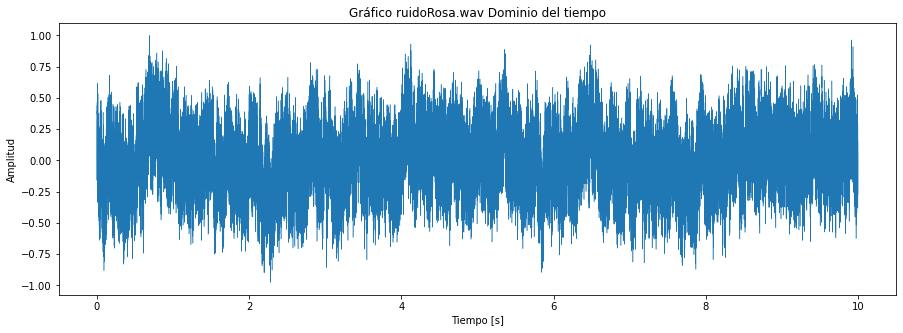

()

In [7]:
# completar
file = 'ruidoRosa.wav'
time_domain_plot(file)

Graficar el dominio espectral del resultado utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

![spec](./Plot%20Ruido%20Rosa%20Audacity.png)

Reproducir resultado.

In [ ]:
# Reproducción de ruido Rosa
filename = 'ruidoRosa.wav'
# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

> Solo a modo de comentario, un **método alternativo** es utilizando un filtro en el siguiente [link](https://ccrma.stanford.edu/~jos/sasp/Example_Synthesis_1_F_Noise.html) se presenta la implementación en Matlab/Octave.

## Funcion de generación de sine sweep logaritmico + filtro inverso
El sine sweep es el método más indicado para generar el impulso por medio de la convolución (Nikolić, I., and O. H. Bjor, 2003). Dado que métodos tales como: explosión de globo, aplauso, disparo con pistola de salva, paper gun ([Paper Popper](https://en.wikipedia.org/wiki/Paper_popper)), golpe entre maderas, petardos, entre otros, carecen de reproducibilidad. Esto es debido a su nivel sonoro, duración y características espectrales, además de una muy baja relación señal ruido, la cual difícilmente se solucione filtrando o promediando con muchas mediciones. Comencemos por ver cómo generar el sine sweep logarítmico $x(t)$ que posee la siguiente forma:

\begin{equation}
f(x) = \sin[\theta(t)]= \sin[K (e^\frac{t}{L} - 1) ]
\tag{1}
\end{equation}

Donde:

\begin{equation}
K = \frac{T w_{1}}{R}
\end{equation}

\begin{equation}
L = \frac{T}{R}
\end{equation}

y el sweep rate $R$: 

\begin{equation}
R = \ln \left( \frac{w_{2}}{w_{1}} \right)
\tag{2}
\end{equation}

Con $w_{1}$ y $w_{2}$, las frecuencias angulares inferior y superior respectivamente, $T$ es el tiempo de duración del sine sweep en segundos (Meng, Q., 2008). Si estudiamos el espectro de la señal de la ecuación (1), se observa que no es plano, sino que disminuye a razón de -3 dB/octava, como el ruido rosa (Ver fig. 2, sup). De modo que el espectro de $x(-t)$ debe ser ajustado, aumentando en 3 dB/octava, de modo que cuando realizamos el cálculo se restaure la plenitud perfecta de la respuesta de impulso medida $h(t)$ (Farina A., 2000) (Ver fig. 2, inf).


<div align="center">
    <img src="./image43.png">
</div>
<center><b>Fig 2.</b> Espectro del sine sweep. Sine sweep logarítmico  (sup). Filtro invertido (inf).</center>


En el dominio temporal las señales del sine sweep logarítmico y el filtro inverso se comportan de la siguiente manera (Ver fig. 3). 

<div align="center">
    <img src="./image46.png">
</div>
<center><b>Fig 3.</b> Magnitud del sine sweep. Sine sweep logarítmico (sup). Filtro invertido (inf).</center>

Para generar el filtro inverso $k(t)$ del sine sweep logarítmico $x(t)$ se requiere de una modulación $m(t)$ definida por la siguiente expresión:

\begin{equation}
m(t) = \frac{w_{1}}{2\pi w(t)}
\tag{3}
\end{equation}

Obtenida de la frecuencia instantánea (dado que la amplitud cambia en función de la
frecuencia), calculada a partir de la ecuación (1):

\begin{equation}
w(t)=\frac{d[\theta (t)]}{dt}=\frac{K}{L} e^\frac{t}{L}
\tag{4}
\end{equation}
m
entonces, el filtro inverso $k(t)$ queda definido como:

\begin{equation}
k(t)=m(t)x(-t)
\tag{5}
\end{equation}

**Consigna:** realizar una función generadora de un sine sweep y su filtro inverso, a partir de las ecuaciones descriptas anteriormente, y graficar el resultado de ambos filtros, usando la función anteriormente creada. Recordar almacenar los audios. Agregar docstring que indique claramente los parametros de entrada y salida.

In [ ]:
# Completar

# Defino la función
def log_sweep_invfilter(f1, f2, t_sweep, fs_sweep):
    """
    Genera Sine Sweep Logarítmico
    
    .. Nota:: si 'SineSweepLog.wav' existe, este será sobreescrito
    
    Parametros
    ----------
    t_sweep: int  
        Duración en segundos del sweep
    fs_sweep: int
        Frecuencia de muestreo
    f1: int
        Frecuencia inferior
    f2: int
        Frecuencia superior
    
    returns: NumPy array
        Datos de la señal generada.
    
    Ejemplo
    -------
    Generar dos archivos `.wav` de 10 segundos con una señal Sine Sweep Logarítmica y un Filtro Inverso 
    entre las frecuencias de 20 a 4000 Hz a una frecuencia de muestreo de 44100 Hz.
    
    import numpy as np
    from matplotlib import pyplot as plt
    import soundfile as sf
    from scipy.io.wavfile import write
    from scipy import signal

    log_sweep_invfilter(20, 4000, 10, 44100)

    """
    t_swipe_arange = np.arange(0, t_sweep*fs_sweep)/fs_sweep  # Arreglo de muestreos
    R = np.log(f2/f1)  # Sweep rate
    K = t_sweep*2*np.pi*f1/R
    L = t_sweep/R
    w = (K/L)*np.exp(t_swipe_arange/L)
    m = f1/w
    # Sine Sweep Logarítmico
    x = np.sin(K*(np.exp(t_swipe_arange/L-1)))
    
    # Filtro Inverso
    k_t = x[::-1]*m
    
    # Gráficos
    plt.figure(figsize=(15,10))
    # Gráfico Sine Sweep Logarítmico
    plt.subplot(2,1,1)
    plt.grid()
    plt.plot(t_swipe_arange, x, linewidth=0.5)
    plt.title('Sine Sweep Logarítmico')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo [s]')
    # Gráfico Filtro Inverso
    plt.subplot(2,1,2)
    plt.grid()
    plt.plot(t_swipe_arange, k_t, linewidth=0.5)
    plt.title('Filtro Inverso')
    plt.ylabel('Amplitud')
    plt.xlabel('Tiempo [s]')

    plt.show()

    # Agregar generación de archivo de audio .wav
    write('SineSweepLog.wav', fs_sweep, x)  # Save as WAV file 
    write('InvFilter.wav', fs_sweep, k_t)  # Save as WAV file 

    
    return x, k_t


Llamar la función.

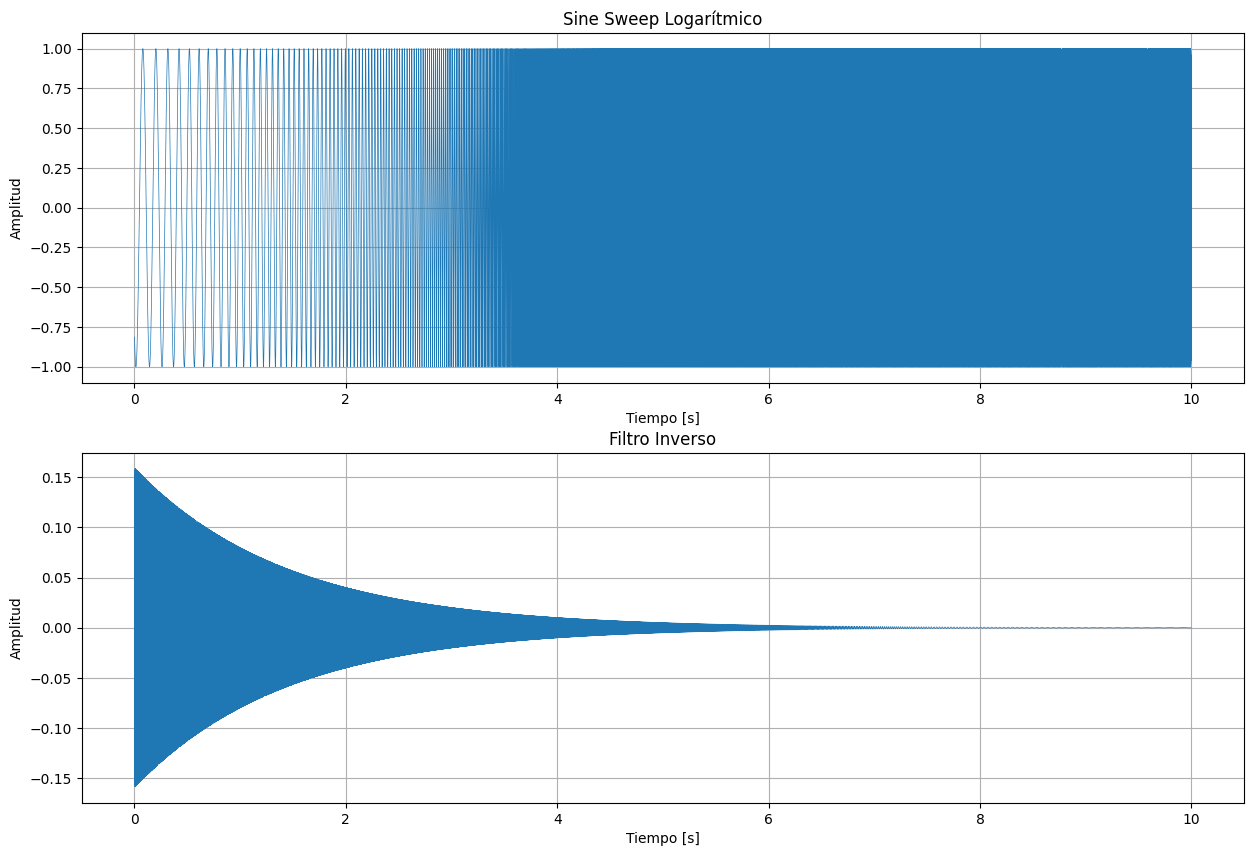

(array([-0.81342851, -0.81403781, -0.81464623, ..., -0.95153934,
        -0.74139828,  0.21149325]),
 array([ 3.36601955e-02, -1.17995352e-01, -1.51437446e-01, ...,
        -1.29661068e-04, -1.29562201e-04, -1.29463196e-04]))

In [ ]:
# completar

# Defino las variables
t_sweep = 10  # Duración en segundos del sweep
fs_sweep = 44100  # Frecuencia de muestreo
f1 = 20  # Frecuencia inferior
f2 = 20000  # Frecuencia superior

log_sweep_invfilter(f1, f2, t_sweep, fs_sweep)

Graficar el dominio espectral del resultado utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

Gráfico de Sine Sweep Logarítmico

![](./SineSweepLog.png)

Gráfico de Filtro Inverso

![](./InvFilter.png)

Reproducir resultados.

In [ ]:
# completar
# Reproducción de Sine Sweep Logarítmico

sine_sweep = 'SineSweepLog.wav'
# Extract data and sampling rate from file
data, fs = sf.read(sine_sweep, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

In [ ]:
# completar

# Reproducción de Filtro Inverso

inv_filter = 'InvFilter.wav'
# Extract data and sampling rate from file
data, fs = sf.read(inv_filter, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

## Función adquisicion y reproducción
**Consigna**: la función tiene que permitir la reproducción y la adquisición de manera simultánea para un tiempo determinado por el usuario. Es importante evaluar y constatar dicha simultaneidad. El módulo debería permitir seleccionar el hardware a utilizar. Algunos articulos de interes para el desarrollo:
* [Clase de audio](../../clases/clase_6/600_audio.ipynb)
* [Sound Device - Simultaneous Playback and Recording](https://python-sounddevice.readthedocs.io/en/0.4.1/usage.html#simultaneous-playback-and-recording)
* [Playing and Recording Sound in Python](https://realpython.com/playing-and-recording-sound-python/)
* [Audio in Python](https://wiki.python.org/moin/Audio/)
* [https://github.com/spatialaudio/python-sounddevice/issues/148](https://github.com/spatialaudio/python-sounddevice/issues/148)

In [ ]:
def record_signal(signal, input_device, output_device, duration):
    """
    Reproducción y grabación de una señal en formato ".wav" en simultáneo.

    Parámetros
    ----------
    signal: Archivo ".wav"

    input_device: int
        Dispositivo de grabación de audio.
    
    output_device: int
        Dispositivo de reproducción de audio.

    duration: 
        Tiempo de grabación de la señal.

    Para ver el listado de dispositivos de audio: 
    
    import sounddevice as sd
    sd.query_devices()
        
    Ejemplo
    -------
    import numpy as np
    import soundfile as sf
    import sounddevice as sd
    
    signal = 'SineSweepLog.wav'
    input_device = 1
    output_device = 4
    record_signal(signal, input_device, output_device)
    
    """
    # Selección de dispositivos de audio
    sd.default.device = input_device, output_device
    # Reproducción de la señal y grabación en simultáneo   
    data, fs = sf.read(signal, dtype='float32')
    samples_rec = duration*fs
    val = data[0:samples_rec]
    signal_recording = sd.playrec(val, fs, channels=1)
    sd.wait()
    write('record_{}'.format(signal), fs, signal_recording)  # Guardo el archivo .wav
    

In [3]:
# Ver la lista de dispositivos de audio
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Micrófono (2- M-Track), MME (2 in, 0 out)
   2 Micrófono (USB Microphone), MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Altavoces (2- M-Track), MME (0 in, 2 out)
   5 Controlador primario de captura de sonido, Windows DirectSound (2 in, 0 out)
   6 Micrófono (2- M-Track), Windows DirectSound (2 in, 0 out)
   7 Micrófono (USB Microphone), Windows DirectSound (2 in, 0 out)
   8 Controlador primario de sonido, Windows DirectSound (0 in, 2 out)
   9 Altavoces (2- M-Track), Windows DirectSound (0 in, 2 out)
  10 ASIO4ALL v2, ASIO (2 in, 8 out)
  11 FL Studio ASIO, ASIO (2 in, 2 out)
  12 Generic Low Latency ASIO Driver, ASIO (1 in, 0 out)
  13 Altavoces (2- M-Track), Windows WASAPI (0 in, 2 out)
  14 Micrófono (2- M-Track), Windows WASAPI (2 in, 0 out)
  15 Micrófono (USB Microphone), Windows WASAPI (1 in, 0 out)
  16 Speakers (Realtek HD Audio output), Windows WDM-KS (0 in, 8 out)
  17 Mezcla esté

Llamar la función.

In [ ]:
# completar
signal = 'SineSweepLog.wav'
record_signal(signal, 1, 4, 10)


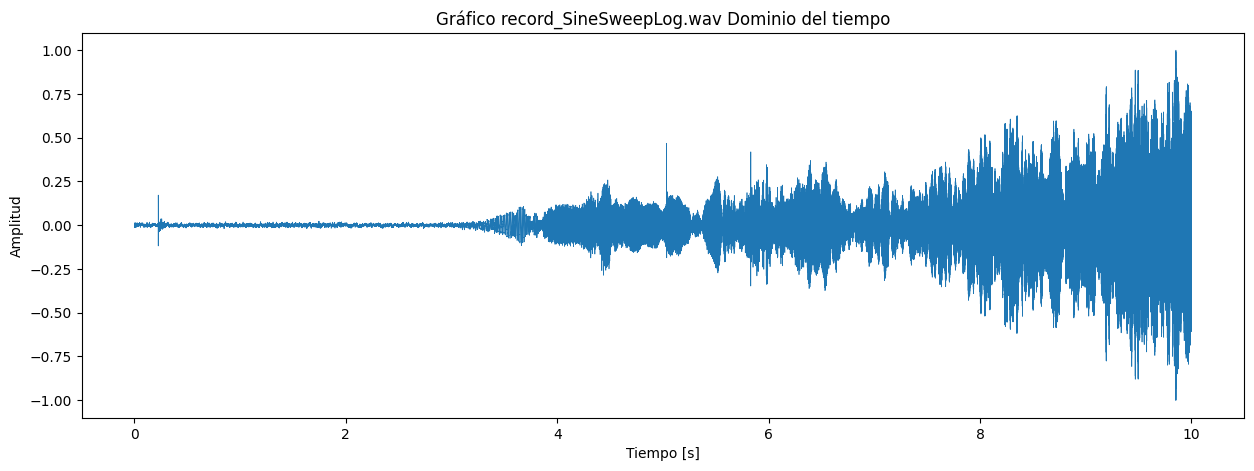

()

In [ ]:
time_domain_plot('record_SineSweepLog.wav')

¿Cómo se podría medir la latencia de la función?

In [ ]:
# Completar


Se puede generar una señal impulsiva a través de una convolución del Sine Sweep y el Filtro inverso.
Luego se pasa la señal a través de la función record_signal() que reproduce y graba en simultáneo.
Por último se mide la diferencia en milisegundos entre el pico de la señal original y el pico de la señal grabada en record_signal()

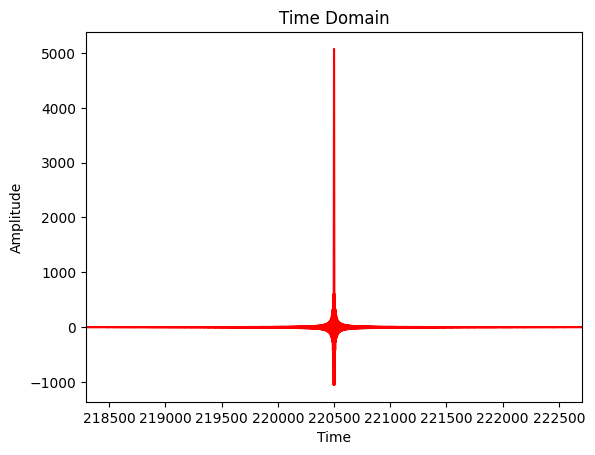

In [ ]:
# convolve
log_signal, fs_log_signal = sf.read("SineSweepLog.wav", dtype='float32')
loginv_signal, fs_inv_signal = sf.read("InvFilter.wav", dtype='float32')

impulse_response = signal.fftconvolve(log_signal, loginv_signal, mode='same')

IR_n = len(impulse_response) # length of the signal
IR_k = np.arange(IR_n)
IR_T = IR_n/fs_inv_signal
IR_frq = IR_k/IR_T # two sides frequency range  
IR_frq = IR_frq[range(IR_n//2)] # one side frequency range
IR_Y = np.fft.fft(impulse_response)/IR_n # fft computing and normalization
IR_Y = IR_Y[range(IR_n//2)]
write('impulse_response.wav', fs_log_signal, impulse_response)  # Save as WAV file 

fig = plt.plot(sharex=False, sharey=False, constrained_layout=True,figsize=(10,5))
plt.plot(impulse_response,'r') # plotting the spectrum
plt.title('Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(len(impulse_response)*(0.5-0.005),len(impulse_response)*(0.5+0.005))
plt.savefig('response_of_IR_New.png', bbox_inches="tight")
plt.show(block=False)


In [ ]:
signal = 'impulse_response.wav'
record_signal(signal, 1, 4, 10)

In [ ]:
# Definimos los array
array_impulse_response = impulse_response
record_impulse, fs_record_impulse = sf.read("record_impulse_response.wav", dtype='float32')

print(len(array_impulse_response), len(record_impulse))  # Cantidad de muestras de cada array

# Buscamos los indices de los valores maximos de cada array
ind_max_ir = np.argmax(array_impulse_response)  
ind_max_rir = np.argmax(record_impulse)

# Printeamos la diferencia
print("Latencia:", ind_max_rir, "-" , ind_max_ir, "=", (ind_max_rir - ind_max_ir)/fs_record_impulse, "segundos" )

441000 441000
Latencia: 223606 - 220500 = 0.07043083900226757 segundos
